<a href="https://colab.research.google.com/github/yugkhot/First-Contribution/blob/master/ECE_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Results for initialization a:
Final Centroids:
[[-6  0  0]
 [ 6  0  1]]
Clusters:
[0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.]


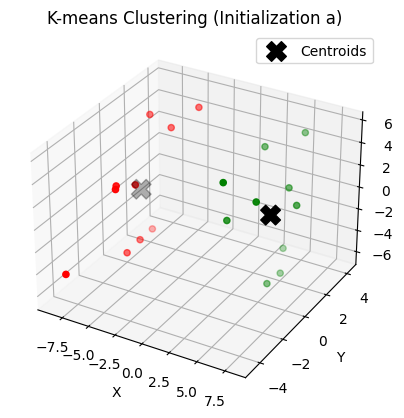


Results for initialization b:
Final Centroids:
[[ 6  0  1]
 [-6  0  0]]
Clusters:
[1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0.]


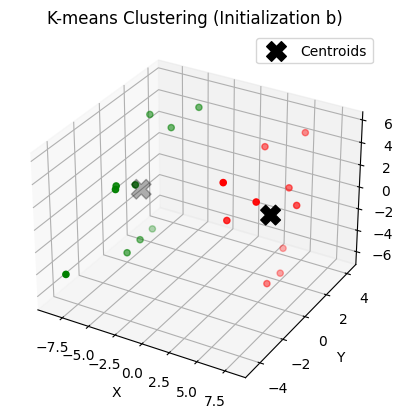

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to calculate Euclidean distance between two points
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# Function to perform K-means clustering
def kmeans(data, k, centroids, max_iterations=100):
    n_samples, n_features = data.shape
    # Initialize clusters
    clusters = np.zeros(n_samples)
    # Initialize previous centroids
    prev_centroids = np.zeros(centroids.shape)
    # Initialize convergence criterion
    convergence = euclidean_distance(centroids, prev_centroids)
    iteration = 0

    # Iterate until convergence or max_iterations reached
    while convergence != 0 and iteration < max_iterations:
        # Assign each sample to the nearest centroid
        for i in range(n_samples):
            distances = [euclidean_distance(data[i], centroid) for centroid in centroids]
            cluster = np.argmin(distances)
            clusters[i] = cluster

        # Store previous centroids
        prev_centroids = np.copy(centroids)

        # Update centroids
        for i in range(k):
            points = [data[j] for j in range(len(data)) if clusters[j] == i]
            centroids[i] = np.mean(points, axis=0)

        # Check convergence
        convergence = euclidean_distance(centroids, prev_centroids)

        iteration += 1

    return clusters, centroids

# Data
data = np.array([
    [-7.82, -4.58, -3.97],
    [-6.68, 3.16, 2.71],
    [4.36, -2.19, 2.09],
    [6.72, 0.88, 2.8],
    [-8.64, 3.06, 3.5],
    [-6.87, 0.57, -5.45],
    [4.47, -2.62, 5.76],
    [6.73, -2.01, 4.18],
    [-7.71, 2.34, -6.33],
    [-6.91, -0.49, -5.68],
    [6.18, 2.81, 5.82],
    [6.72, -0.93, -4.04],
    [-6.25, -0.26, 0.56],
    [-6.94, -1.22, 1.13],
    [8.09, 0.2, 2.25],
    [6.81, 0.17, -4.15],
    [-5.19, 4.24, 4.04],
    [-6.38, -1.74, 1.43],
    [4.08, 1.3, 5.33],
    [6.27, 0.93, -2.78]
])

# Initialization values for k-means
k_values = [2, 2]
initial_centroids = [
    np.array([[0, 0, 0], [1, 1, -1]]),
    np.array([[1, 1, 1], [-1, 1, -1]])
]

for i, k in enumerate(k_values):
    print(f"\nResults for initialization {chr(97+i)}:")
    clusters, centroids = kmeans(data, k, initial_centroids[i])
    print("Final Centroids:")
    print(centroids)
    print("Clusters:")
    print(clusters)

    # Visualization
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    colors = ['r', 'g', 'b', 'y', 'c', 'm']

    for cluster_idx in range(k):
        cluster_points = data[clusters == cluster_idx]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], c=colors[cluster_idx], marker='o')

    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=200, c='black', marker='X', label='Centroids')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    plt.title(f'K-means Clustering (Initialization {chr(97+i)})')
    plt.show()



In [3]:
import numpy as np

# Expectation step
def expectation(data, pi, mu, sigma):
    n_samples = len(data)
    n_components = len(pi)
    responsibilities = np.zeros((n_samples, n_components))

    for i in range(n_samples):
        for j in range(n_components):
            responsibilities[i, j] = pi[j] * gaussian_pdf(data[i], mu[j], sigma[j])
        responsibilities[i] /= np.sum(responsibilities[i])

    return responsibilities

# Maximization step
def maximization(data, responsibilities):
    n_samples, n_features = data.shape
    n_components = responsibilities.shape[1]

    # Update pi
    pi = np.mean(responsibilities, axis=0)

    # Update mu
    mu = np.dot(responsibilities.T, data) / np.sum(responsibilities, axis=0)[:, np.newaxis]

    # Update sigma
    sigma = []
    for j in range(n_components):
        sigma_j = np.zeros((n_features, n_features))
        for i in range(n_samples):
            diff = (data[i] - mu[j]).reshape(-1, 1)
            sigma_j += responsibilities[i, j] * np.dot(diff, diff.T)
        sigma.append(sigma_j / np.sum(responsibilities[:, j]))

    return pi, mu, sigma

# Gaussian probability density function
def gaussian_pdf(x, mu, sigma):
    n_features = len(x)
    det_sigma = np.linalg.det(sigma)
    if det_sigma == 0:
        det_sigma = np.finfo(float).eps
    exponent = -0.5 * np.dot(np.dot((x - mu).T, np.linalg.inv(sigma)), (x - mu))
    return (1 / ((2 * np.pi) ** (n_features / 2) * np.sqrt(det_sigma))) * np.exp(exponent)

# EM algorithm
def expectation_maximization(data, n_components, max_iterations=100, tol=1e-4):
    n_samples, n_features = data.shape

    # Initialize parameters randomly
    pi = np.ones(n_components) / n_components
    mu = np.random.randn(n_components, n_features)
    sigma = [np.eye(n_features) for _ in range(n_components)]

    # EM iterations
    for _ in range(max_iterations):
        old_mu = np.copy(mu)
        old_sigma = np.copy(sigma)

        # E-step
        responsibilities = expectation(data, pi, mu, sigma)

        # M-step
        pi, mu, sigma = maximization(data, responsibilities)

        # Check for convergence
        if np.max(np.abs(mu - old_mu)) < tol and np.max(np.abs(sigma - old_sigma)) < tol:
            break

    return pi, mu, sigma

# Data
data = np.array([
    [-7.82, -4.58, -3.97],
    [-6.68, 3.16, 2.71],
    [4.36, -2.19, 2.09],
    [6.72, 0.88, 2.8],
    [-8.64, 3.06, 3.5],
    [-6.87, 0.57, -5.45],
    [4.47, -2.62, 5.76],
    [6.73, -2.01, 4.18],
    [-7.71, 2.34, -6.33],
    [-6.91, -0.49, -5.68],
    [6.18, 2.81, 5.82],
    [6.72, -0.93, -4.04],
    [-6.25, -0.26, 0.56],
    [-6.94, -1.22, 1.13],
    [8.09, 0.2, 2.25],
    [6.81, 0.17, -4.15],
    [-5.19, 4.24, 4.04],
    [-6.38, -1.74, 1.43],
    [4.08, 1.3, 5.33],
    [6.27, 0.93, -2.78]
])

# Number of components
n_components = 2

# Run EM algorithm
pi, mu, sigma = expectation_maximization(data, n_components)

# Print results
print("Estimated mixing coefficients (pi):", pi)
print("Estimated means (mu):", mu)
print("Estimated covariances (sigma):", sigma)


Estimated mixing coefficients (pi): [0.36143117 0.63856883]
Estimated means (mu): [[-2.43608566  1.50303201  3.56830171]
 [ 0.67726026 -0.56727263 -1.29930468]]
Estimated covariances (sigma): [array([[35.75852667, -1.70566723,  7.30225603],
       [-1.70566723,  5.06367021,  1.72213407],
       [ 7.30225603,  1.72213407,  2.50644843]]), array([[44.08412181,  0.68449064, 13.5408981 ],
       [ 0.68449064,  3.1119439 , -2.08275909],
       [13.5408981 , -2.08275909, 15.43302964]])]


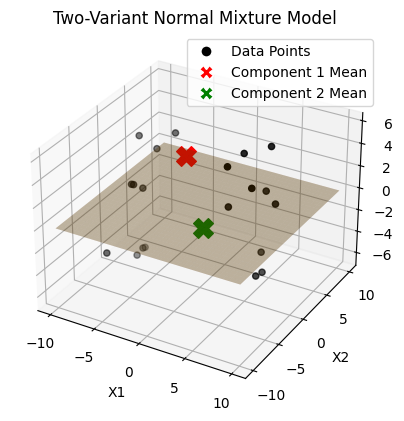

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

def plot_3d_mixture(data, pi, mu, sigma):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    colors = ['r', 'g', 'b', 'y', 'c', 'm']

    # Plot data points
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='black', marker='o', label='Data Points')

    # Plot mixture components
    for i in range(len(pi)):
        # Generate meshgrid for surface
        x, y = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
        pos = np.empty(x.shape + (3,))
        pos[:, :, 0] = x
        pos[:, :, 1] = y
        pos[:, :, 2] = mu[i][2]  # Fix Z-coordinate to the mean value
        z = multivariate_normal.pdf(pos, mean=mu[i], cov=sigma[i])
        ax.plot_surface(x, y, z, rstride=3, cstride=3, alpha=0.2, color=colors[i])

        ax.scatter(mu[i][0], mu[i][1], mu[i][2], c=colors[i], marker='X', s=200, label=f'Component {i+1} Mean')

    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')

    # Plot the legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=8, label='Data Points')]
    for i in range(len(pi)):
        handles.append(plt.Line2D([0], [0], linestyle='None', marker='X', color='w', markerfacecolor=colors[i], markersize=10, label=f'Component {i+1} Mean'))
    ax.legend(handles=handles, loc='upper right')

    plt.title('Two-Variant Normal Mixture Model')
    plt.show()

# Provided estimated parameters
pi = np.array([0.36143117, 0.63856883])
mu = np.array([[-2.43608566, 1.50303201, 3.56830171], [0.67726026, -0.56727263, -1.29930468]])
sigma = [
    np.array([[35.75852667, -1.70566723, 7.30225603],
              [-1.70566723, 5.06367021, 1.72213407],
              [7.30225603, 1.72213407, 2.50644843]]),
    np.array([[44.08412181, 0.68449064, 13.5408981],
              [0.68449064, 3.1119439, -2.08275909],
              [13.5408981, -2.08275909, 15.43302964]])
]

# Plotting
plot_3d_mixture(data, pi, mu, sigma)
